# Exploratory Data Analysis - on Emission Reports to EPA by GHGRP 

    1. Introduction
    2. Imports
    3. Loading the data
    4. Emissions trend by States
    5. Emissions Trend by IT Sectors
    
    



### 1. Introduction

With the emission reports submitted by GHGRP(Greenhouse Gases Reporting Program) to EDA(Environmental Protection Agency of United States) over the past decade, 2011-2020, we are trying to see the pattern of how the emission has been taken care of by various industries in the different states of US. There has been some data missing in the earlier industries, as more industries started to report the emissions data in the recent years. So, this missing data has been handled by imputing the mean value of the emissions, thereby minimizing the effect of these imputed values on the original data. 

We are trying to see how the industries have been doing with the emissions and also eventually figure out and predict how the emissions will be after this decade, by 2030. EDA aims phasing down production and consumption by 85 percent over the next 15 years, maximizing reclamation and minimizing releases from equipment, and facilitating the transition to next-generation technologies through sector-based restrictions. A global HFC phasedown is expected to avoid up to 0.5° Celsius of global warming by 2100.


### 2. Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA


In [3]:
df_de =pd.read_excel('data.xlsx',sheet_name='sheet1',index_col=0)
df_sf6 =pd.read_excel('data.xlsx',sheet_name='sheet2')
df_oog=pd.read_excel('data.xlsx',sheet_name='sheet3')
df_ldc=pd.read_excel('data.xlsx',sheet_name='sheet4')


In [4]:
df_de.head()

,FRS_Id,Facility_Name,City,State,Zip Code,Address,County,Latitude,Longitude,Primary_NAICS_Code,...,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
Facility Id,,,,,,,,,,,,,,,,,,,,,
1004377,1.100438e+11,121 REGIONAL DISPOSAL FACILITY,MELISSA,TX,75454,3820 SAM RAYBURN HIGHWAY,COLLIN COUNTY,33.298570,-96.535860,562212,...,504064.000,518680.250,653854.000000,250497.500000,221014.750000,199011.750000,241883.500000,289953.250000,204000.000000,194000.000000
1000112,1.100198e+11,23rd and 3rd,BROOKLYN,NY,11232,730 3rd Avenue,Kings,40.663000,-74.000000,221112,...,60819.700,44658.384,70705.288000,52698.656000,66797.352000,67399.252000,40722.200000,102599.220000,68984.744000,100591.828000
1013621,1.100708e+11,3Bear Libby Gas Plant,Hobbs,NM,88240,674 Marathon Rd,LEA COUNTY,32.540693,-103.522351,211130,...,40521.812,38691.478,435280.099943,431488.809907,447423.757318,467277.995747,491686.293592,500278.254166,507639.706331,534026.861412
1003742,1.100104e+11,31st Street Landfill,WESTCHESTER,IL,60154,11700 W 31ST ST,COOK COUNTY,41.835129,-87.915924,562212,...,100500.948,18925.400,31220.150000,29026.800000,120657.600000,92696.600000,120707.350000,97467.500000,87357.750000,95113.250000
1003188,1.100006e+11,3M BROWNWOOD,BROWNWOOD,TX,76801,4501 HIGHWAY 377 SOUTH,BROWN COUNTY,31.671177,-98.996513,326113,...,29359.640,30571.636,34432.420000,36202.264000,31773.480000,36754.712000,36419.864000,34821.820000,33671.924000,37149.360000


In [5]:
df_de.index.rename('Fac_Id',inplace=True)
df_de.head()

,FRS_Id,Facility_Name,City,State,Zip Code,Address,County,Latitude,Longitude,Primary_NAICS_Code,...,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
Fac_Id,,,,,,,,,,,,,,,,,,,,,
1004377,1.100438e+11,121 REGIONAL DISPOSAL FACILITY,MELISSA,TX,75454,3820 SAM RAYBURN HIGHWAY,COLLIN COUNTY,33.298570,-96.535860,562212,...,504064.000,518680.250,653854.000000,250497.500000,221014.750000,199011.750000,241883.500000,289953.250000,204000.000000,194000.000000
1000112,1.100198e+11,23rd and 3rd,BROOKLYN,NY,11232,730 3rd Avenue,Kings,40.663000,-74.000000,221112,...,60819.700,44658.384,70705.288000,52698.656000,66797.352000,67399.252000,40722.200000,102599.220000,68984.744000,100591.828000
1013621,1.100708e+11,3Bear Libby Gas Plant,Hobbs,NM,88240,674 Marathon Rd,LEA COUNTY,32.540693,-103.522351,211130,...,40521.812,38691.478,435280.099943,431488.809907,447423.757318,467277.995747,491686.293592,500278.254166,507639.706331,534026.861412
1003742,1.100104e+11,31st Street Landfill,WESTCHESTER,IL,60154,11700 W 31ST ST,COOK COUNTY,41.835129,-87.915924,562212,...,100500.948,18925.400,31220.150000,29026.800000,120657.600000,92696.600000,120707.350000,97467.500000,87357.750000,95113.250000
1003188,1.100006e+11,3M BROWNWOOD,BROWNWOOD,TX,76801,4501 HIGHWAY 377 SOUTH,BROWN COUNTY,31.671177,-98.996513,326113,...,29359.640,30571.636,34432.420000,36202.264000,31773.480000,36754.712000,36419.864000,34821.820000,33671.924000,37149.360000


In [6]:
df_de.columns

Index(['FRS_Id', 'Facility_Name', 'City', 'State', 'Zip Code', 'Address',
       'County', 'Latitude', 'Longitude', 'Primary_NAICS_Code', 'IT_subparts',
       'IT_sectors', '2020', '2019', '2018', '2017', '2016', '2015', '2014',
       '2013', '2012', '2011'],
      dtype='object')

In [7]:
df_de_group = df_de.groupby('State')[['2020','2019','2018','2017','2016','2015','2014','2013','2012','2011']].mean().apply(lambda x: round(x,2))
df_de_group.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, AK to WY
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2020    54 non-null     float64
 1   2019    54 non-null     float64
 2   2018    54 non-null     float64
 3   2017    54 non-null     float64
 4   2016    54 non-null     float64
 5   2015    54 non-null     float64
 6   2014    54 non-null     float64
 7   2013    54 non-null     float64
 8   2012    54 non-null     float64
 9   2011    54 non-null     float64
dtypes: float64(10)
memory usage: 4.6+ KB


In [8]:
df_de_group.describe()

,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,5.400000e+01
mean,341519.065185,373414.029815,397565.381667,397353.626111,414912.537222,436718.639630,456891.439259,465164.853519,477648.179630,5.188616e+05
std,160845.240990,174789.235984,186897.263877,185616.317257,187268.665755,195600.449659,202133.595801,201888.766538,201715.149215,2.399984e+05
min,59417.180000,63455.640000,68642.990000,81703.720000,85414.820000,94672.340000,91641.670000,94677.980000,107202.080000,1.173564e+05
25%,255241.385000,276539.762500,264171.417500,263396.805000,268903.050000,290582.885000,299988.907500,294338.020000,325380.107500,3.648028e+05
50%,319187.815000,343344.105000,380908.440000,378141.555000,397191.230000,419423.655000,454315.090000,471625.920000,470430.760000,5.099477e+05
75%,421860.850000,454283.352500,485810.687500,452241.982500,481361.685000,516291.002500,531641.140000,562387.577500,560031.542500,6.063037e+05
max,776126.140000,808391.500000,878193.550000,892322.330000,856710.420000,915502.800000,926881.760000,989476.920000,983929.120000,1.373103e+06


We can notice that the average direct emissions has come down from 518301 metric tons to 341519 metric tons over the decade.

In [9]:
df_de_group.sort_values(by='2020',ascending =False)

,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
State,,,,,,,,,,
WY,776126.14,808391.50,878193.55,892322.33,856710.42,915502.80,926881.76,989476.92,983929.12,963811.98
PR,696112.75,625328.24,573758.37,556996.86,697742.95,804091.18,782278.04,805878.82,882734.37,934894.98
FL,692818.77,694640.28,776893.27,751406.71,766308.24,758304.39,757632.32,726163.05,760897.39,804265.35
MO,637050.23,672098.60,732764.01,773481.87,710799.37,750499.37,803290.61,833318.76,838128.63,899409.46
IN,583083.48,675722.35,758857.18,729155.23,744073.41,750705.49,840281.82,827593.48,830356.06,855324.65
ND,580395.25,615146.86,674565.09,644213.03,646100.53,679076.56,644829.38,694738.19,752845.07,764197.54
WV,569000.49,664185.86,716029.37,792153.65,835915.83,806055.90,841746.14,820841.32,818027.23,869435.19
MT,518496.09,745868.36,706961.20,732524.34,768073.90,834736.09,796977.24,758300.13,755540.98,780666.63
UT,510993.04,554437.81,576151.47,573405.94,579319.90,664224.72,674353.70,683702.75,628713.60,657320.89


Comparing both the tables,We can see that Wyoming tops the list in the 2020-2017.. other states seems to have reduced the direct emission better than Wyoming. 

In [10]:
df_de_state = pd.melt(df_de_group,ignore_index=False,var_name='Year',value_name="Emission in metric tons")


In [11]:
df_de_state_max = df_de_state[df_de_state['Emission in metric tons']== df_de_state['Emission in metric tons'].max()]
df_de_state_max

,Year,Emission in metric tons
State,,
VI,2011,1373102.81


In [12]:
df_de_state_min = df_de_state[df_de_state['Emission in metric tons']== df_de_state['Emission in metric tons'].min()]
df_de_state_min

,Year,Emission in metric tons
State,,
DC,2020,59417.18


In [14]:
df_de_state.sort_values(by='Year', ascending=False)

,Year,Emission in metric tons
State,,
AK,2020,227011.06
SC,2020,326637.72
NE,2020,370176.80
NH,2020,128043.94
NJ,2020,232690.46
...,...,...
MD,2011,512797.89
ME,2011,295204.89
MI,2011,471646.38


<AxesSubplot:xlabel='Year', ylabel='Emission in metric tons'>

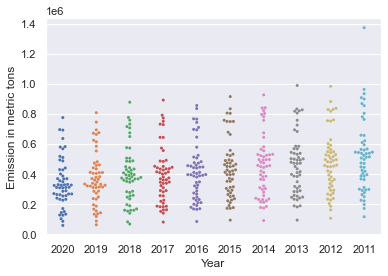

In [16]:
sns.swarmplot(x='Year', y='Emission in metric tons', size= 3, data= df_de_state)

In [17]:
df_de_state.groupby('Year').min().sort_values(by=['Year','Emission in metric tons'])

,Emission in metric tons
Year,
2011,117356.44
2012,107202.08
2013,94677.98
2014,91641.67
2015,94672.34
2016,85414.82
2017,81703.72
2018,68642.99
2019,63455.64


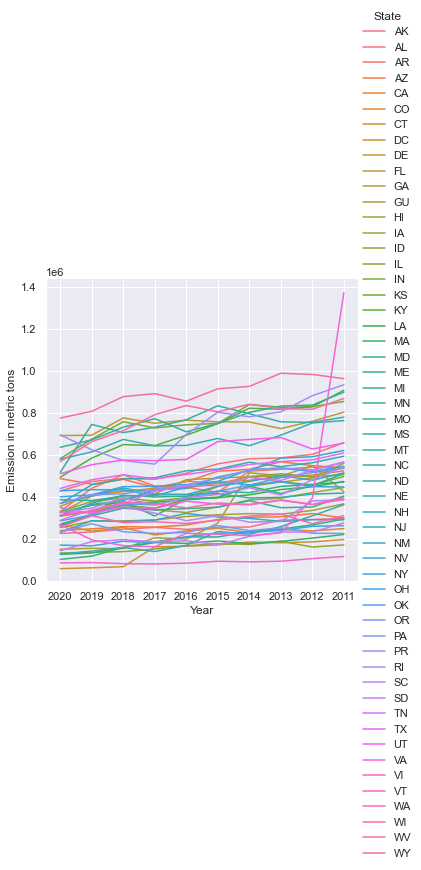

In [18]:
sns.relplot(x='Year', y='Emission in metric tons', hue='State', markers = True, dashes = False, kind='line', data=df_de_state )

Both the plot and the trend above show that almost all the States consistently showing a reduction in the emission levels. 

In [31]:
df_de_it = df_de.groupby('IT_sectors')[['2020','2019','2018','2017','2016','2015','2014','2013','2012','2011']].mean().apply(lambda x: round(x,2))
df_de_it.describe()

,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
count,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01
mean,1.491950e+06,1.568212e+06,1.617135e+06,1.569384e+06,1.583370e+06,1.645018e+06,1.651817e+06,1.687177e+06,1.665998e+06,1.686357e+06
std,1.867757e+06,1.939223e+06,1.968377e+06,1.924594e+06,1.936530e+06,2.003390e+06,1.992219e+06,2.049031e+06,2.016930e+06,2.080075e+06
min,2.804500e+02,1.892000e+02,3.068500e+02,3.581500e+02,2.950500e+02,4.840000e+01,2.807500e+02,1.575940e+03,2.787000e+02,2.597000e+02
25%,9.116006e+04,1.077157e+05,1.214967e+05,1.492012e+05,1.624602e+05,1.754746e+05,1.974780e+05,2.074177e+05,2.524441e+05,2.841495e+05
50%,4.784886e+05,7.082570e+05,7.488351e+05,7.198152e+05,6.634311e+05,7.037434e+05,7.386794e+05,7.457140e+05,7.589737e+05,7.502238e+05
75%,2.207703e+06,2.268102e+06,2.214498e+06,2.169771e+06,2.375431e+06,2.397181e+06,2.227839e+06,2.258289e+06,2.254042e+06,2.434158e+06
max,6.558090e+06,7.655594e+06,6.973092e+06,7.115795e+06,7.195194e+06,7.192878e+06,7.229060e+06,7.387407e+06,7.276498e+06,7.303151e+06


In [32]:
df_de_it.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, Chemicals to Waste
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2020    62 non-null     float64
 1   2019    62 non-null     float64
 2   2018    62 non-null     float64
 3   2017    62 non-null     float64
 4   2016    62 non-null     float64
 5   2015    62 non-null     float64
 6   2014    62 non-null     float64
 7   2013    62 non-null     float64
 8   2012    62 non-null     float64
 9   2011    62 non-null     float64
dtypes: float64(10)
memory usage: 5.3+ KB


In [33]:
df_de_it

,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
IT_sectors,,,,,,,,,,
Chemicals,318311.27,329385.94,328702.97,324480.95,329337.19,336876.95,330480.84,322470.81,325388.41,335506.59
"Chemicals,Coal-based Liquid Fuel Supply,Suppliers of CO2",3230507.30,3137752.80,4082335.70,3234852.90,3326537.68,2882904.74,1246360.40,2123868.34,2858253.86,3042548.26
"Chemicals,Industrial Gas Suppliers",281269.82,354742.82,318417.08,366002.53,374851.51,420594.74,459221.66,612975.65,741325.44,765778.10
"Chemicals,Industrial Gas Suppliers,Minerals",49540.27,32126.48,40325.94,33796.91,41687.84,45416.31,66306.63,64664.11,56198.97,73653.20
"Chemicals,Industrial Gas Suppliers,Waste",32761.46,42333.54,54078.74,103988.20,50211.76,655440.68,761651.07,1012023.50,869407.86,831665.61
...,...,...,...,...,...,...,...,...,...,...
"Pulp and Paper,Suppliers of CO2",154517.58,164000.67,164948.70,179059.19,168043.14,150743.05,137932.10,187547.13,195988.99,190688.30
"Pulp and Paper,Suppliers of CO2,Waste",312713.12,349385.39,339695.40,338360.86,326747.51,330128.24,333036.55,305391.51,339904.72,227803.38
"Pulp and Paper,Waste",294747.95,297064.66,297981.25,299540.50,321761.61,315879.34,318441.43,324005.87,342774.13,354670.19


In [30]:
df_de_it = pd.melt(df_de_it,ignore_index=False,var_name='Year',value_name="Emission in metric tons")
df_de_it = df_de_it.reset_index()
df_de_it.head(30)

,IT_sectors,Year,Emission in metric tons
0,Chemicals,2020,318311.27
1,"Chemicals,Coal-based Liquid Fuel Supply,Suppli...",2020,3230507.30
2,"Chemicals,Industrial Gas Suppliers",2020,281269.82
3,"Chemicals,Industrial Gas Suppliers,Minerals",2020,49540.27
4,"Chemicals,Industrial Gas Suppliers,Waste",2020,32761.46
5,"Chemicals,Other,Petroleum Product Suppliers,Po...",2020,5106325.56
6,"Chemicals,Other,Petroleum and Natural Gas Syst...",2020,4670152.59
7,"Chemicals,Petroleum Product Suppliers",2020,1176171.38
8,"Chemicals,Petroleum Product Suppliers,Power Pl...",2020,5969593.13
9,"Chemicals,Petroleum Product Suppliers,Power Pl...",2020,3508262.75


<AxesSubplot:xlabel='Year', ylabel='Emission in metric tons'>

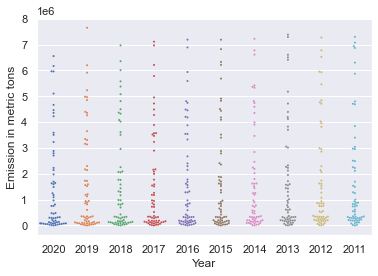

In [133]:
sns.swarmplot(x='Year', y='Emission in metric tons', size= 2, data= df_de_it)

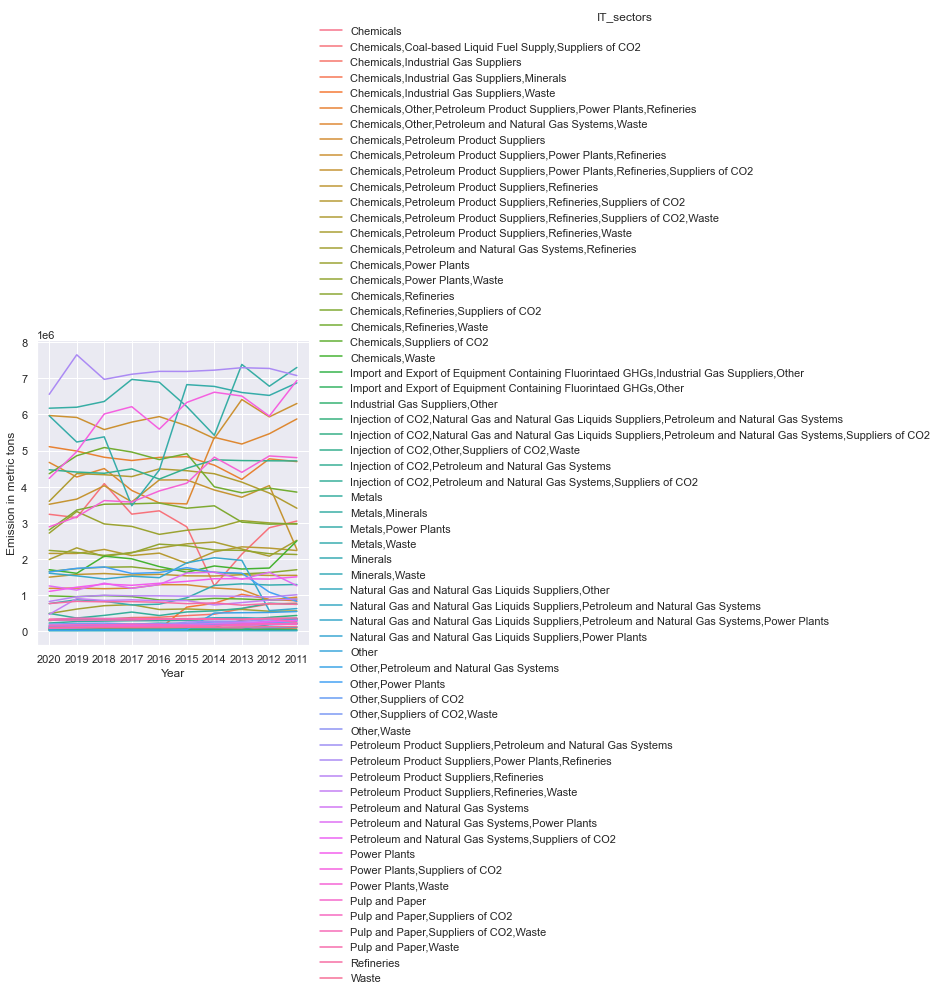

In [135]:
sns.relplot(x='Year', y='Emission in metric tons', data=df_de_it, kind='line', hue='IT_sectors')

The plot and the trends above on the emission by IT sectors in the decade 2011 - 2020 show that there hasn't been any significant reducing trend been seen. 

In [136]:
df_de_it_st_0 = df_de.groupby(['State','IT_sectors'])[['2020','2019','2018','2017','2016','2015','2014','2013','2012','2011']].mean().apply(lambda x: round(x,2))


In [137]:
df_de_it_st_0.head()

2020  \
State IT_sectors                                                      
AK    Chemicals,Petroleum Product Suppliers,Refineries     85459.44   
      Chemicals,Petroleum and Natural Gas Systems,Ref...  475952.98   
      Other                                                84518.85   
      Petroleum Product Suppliers,Refineries              183045.13   
      Petroleum and Natural Gas Systems                   453520.61   

                                                               2019  \
State IT_sectors                                                      
AK    Chemicals,Petroleum Product Suppliers,Refineries     85877.31   
      Chemicals,Petroleum and Natural Gas Systems,Ref...  600981.03   
      Other                                                76957.84   
      Petroleum Product Suppliers,Refineries              202376.40   
      Petroleum and Natural Gas Systems                   445897.42   

                                                               2018  \
State IT_sectors                                                      
AK    Chemicals,Petroleum Product Suppliers,Refineries     79770.61   
      Chemicals,Petroleum and Natural Gas Systems,Ref...  695400.30   
      Other                                               135133.68   
      Petroleum Product Suppliers,Refineries              205750.48   
      Petroleum and Natural Gas Systems                   444387.77   

                                                               2017  \
State IT_sectors                                                      
AK    Chemicals,Petroleum Product Suppliers,Refineries     73953.38   
      Chemicals,Petroleum and Natural Gas Systems,Ref...  723807.79   
      Other                                               137083.32   
      Petroleum Product Suppliers,Refineries              199390.18   
      Petroleum and Natural Gas Systems                   442243.90   

                                                               2016  \
State IT_sectors                                                      
AK    Chemicals,Petroleum Product Suppliers,Refineries     72235.88   
      Chemicals,Petroleum and Natural Gas Systems,Ref...  589663.71   
      Other                                               108366.96   
      Petroleum Product Suppliers,Refineries              187904.77   
      Petroleum and Natural Gas Systems                   447281.86   

                                                               2015  \
State IT_sectors                                                      
AK    Chemicals,Petroleum Product Suppliers,Refineries     80653.72   
      Chemicals,Petroleum and Natural Gas Systems,Ref...  604584.14   
      Other                                               111860.71   
      Petroleum Product Suppliers,Refineries              190899.49   
      Petroleum and Natural Gas Systems                   458422.66   

                                                               2014  \
State IT_sectors                                                      
AK    Chemicals,Petroleum Product Suppliers,Refineries    114751.11   
      Chemicals,Petroleum and Natural Gas Systems,Ref...  577309.02   
      Other                                               115089.78   
      Petroleum Product Suppliers,Refineries              193758.65   
      Petroleum and Natural Gas Systems                   438472.14   

                                                               2013  \
State IT_sectors                                                      
AK    Chemicals,Petroleum Product Suppliers,Refineries    105020.37   
      Chemicals,Petroleum and Natural Gas Systems,Ref...  590568.96   
      Other                                               151755.29   
      Petroleum Product Suppliers,Refineries              179286.89   
      Petroleum and Natural Gas Systems                   457758.32   

                                                               2012       2011 

In [138]:
df_de_it_st_0.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 626 entries, ('AK', 'Chemicals,Petroleum Product Suppliers,Refineries') to ('WY', 'Waste')
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2020    626 non-null    float64
 1   2019    626 non-null    float64
 2   2018    626 non-null    float64
 3   2017    626 non-null    float64
 4   2016    626 non-null    float64
 5   2015    626 non-null    float64
 6   2014    626 non-null    float64
 7   2013    626 non-null    float64
 8   2012    626 non-null    float64
 9   2011    626 non-null    float64
dtypes: float64(10)
memory usage: 51.1+ KB


In [139]:
df_de_it_st = pd.melt(df_de_it_st_0,ignore_index=False, var_name=['Year'],value_name="Emission in metric tons").reset_index()
df_de_it_st.columns
df_de_it_st.head()

,State,IT_sectors,Year,Emission in metric tons
0,AK,"Chemicals,Petroleum Product Suppliers,Refineries",2020,85459.44
1,AK,"Chemicals,Petroleum and Natural Gas Systems,Re...",2020,475952.98
2,AK,Other,2020,84518.85
3,AK,"Petroleum Product Suppliers,Refineries",2020,183045.13
4,AK,Petroleum and Natural Gas Systems,2020,453520.61


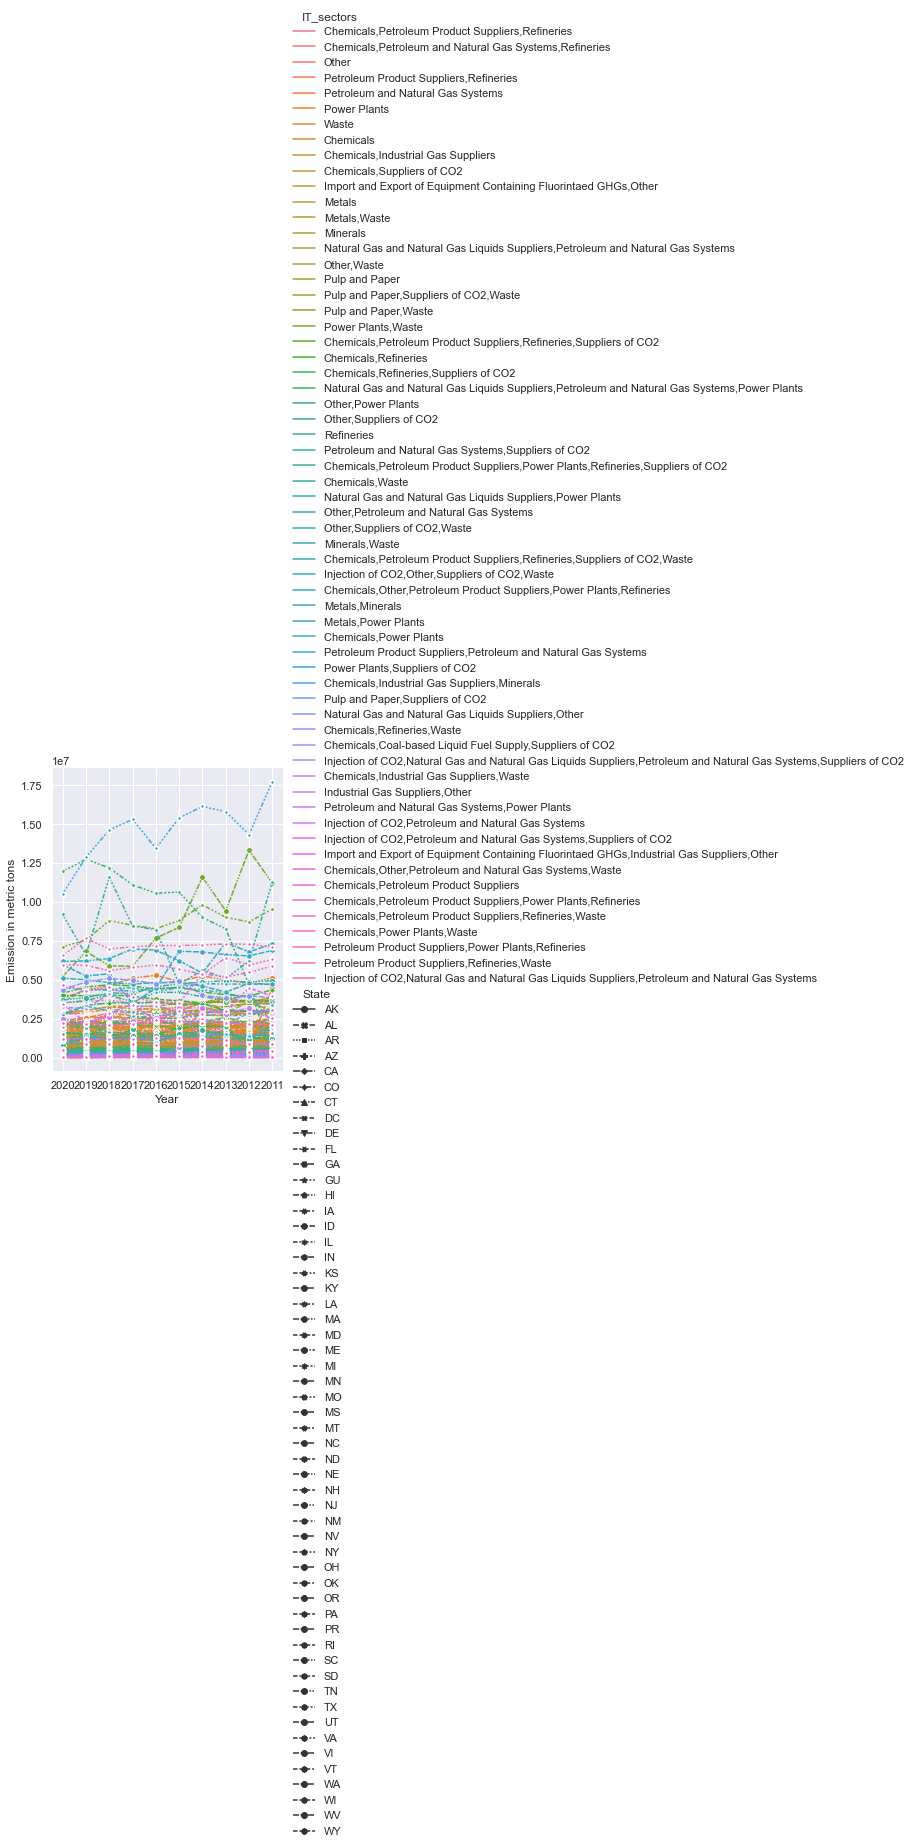

In [140]:
sns.relplot(x='Year', y='Emission in metric tons', hue='IT_sectors', style = "State", kind='line', markers= True, data=df_de_it_st)

Sulfur hexafluoride (SF6) is a synthetic fluorinated compound with an extremely stable molecular structure. Because of its unique dielectric properties, electric utilities rely heavily on SF6 in electric power systems for voltage electrical insulation, current interruption, and arc quenching in the transmission and distribution of electricity. Yet, it is also the most potent greenhouse gas known to-date. Over a 100-year period, SF6 is 22,800 times more effective at trapping infrared radiation than an equivalent amount of carbon dioxide (CO2). SF6 is also a very stable chemical, with an atmospheric lifetime of 3,200 years. As the gas is emitted, it accumulates in the atmosphere in an essentially un-degraded state for many centuries. Thus, a relatively small amount of SF6 can have a significant impact on global climate change.

The electric power industry can reduce the nation’s SF6 emissions through cost-effective operational improvements and equipment upgrades. Through improvements in the leak rate of new equipment, refurbishing older equipment, and the use of more efficient operation and maintenance techniques, utilities often find economical solutions to reduce SF6 emissions. For more info, citation: https://www.epa.gov/eps-partnership/sulfur-hexafluoride-sf6-basics

In [144]:
df_sf6_itsb_0

,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
IT_subparts,,,,,,,,,,
"C,D,DD",12861.77,35769.85,15692.23,18885.78,44274.14,35858.21,45678.55,45571.55,43290.14,46050.51
"C,D,DD,MM-REF,P,Y",1158.24,1454.64,1083.00,579.12,114.00,428.64,2088.48,693.12,346.56,46050.51
"C,DD",8700.67,35769.85,10943.33,12716.68,14913.85,23992.88,30512.41,15428.40,43290.14,15515.85
"C,DD,TT,W-UNSTG,X",29.64,35769.85,567.72,1643.88,44274.14,1035.12,1035.12,1035.12,6826.32,2275.44
"D,DD",19658.60,27140.31,24333.50,29575.84,34061.75,27184.36,31011.62,35571.75,33106.00,35713.22
DD,27640.02,36652.32,34886.27,40569.36,46493.25,37660.06,48145.21,48390.06,44830.44,48316.25


In [145]:
df_sf6_it_st_0 = df_sf6.groupby(['State','IT_subparts'])[['2020','2019','2018','2017','2016','2015','2014','2013','2012','2011']].mean().apply(lambda x: round(x,2))
df_sf6_it_st_0.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 44 entries, ('AL', 'DD') to ('WA', 'DD')
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2020    44 non-null     float64
 1   2019    44 non-null     float64
 2   2018    44 non-null     float64
 3   2017    44 non-null     float64
 4   2016    44 non-null     float64
 5   2015    44 non-null     float64
 6   2014    44 non-null     float64
 7   2013    44 non-null     float64
 8   2012    44 non-null     float64
 9   2011    44 non-null     float64
dtypes: float64(10)
memory usage: 4.0+ KB


In [146]:
df_sf6_it_state = df_sf6[['State', 'IT_subparts']]

In [147]:
df_sf6_it_state.groupby('State').count().sort_values(by='IT_subparts', ascending=False)

,IT_subparts
State,
TX,14
CA,10
NY,6
WA,4
MI,4
FL,4
PA,4
MN,4
OH,3


In [148]:
df_sf6_it_state.groupby('IT_subparts').count().sort_values(by='State', ascending=False)

,State
IT_subparts,
DD,78
"D,DD",4
"C,DD",3
"C,D,DD",2
"C,D,DD,MM-REF,P,Y",1
"C,DD,TT,W-UNSTG,X",1


In [149]:
df_sf6_it_st = pd.melt(df_sf6_it_st_0,ignore_index=False, var_name=['Year'],value_name="Emission in metric tons").reset_index()
df_sf6_it_st.columns
df_sf6_it_st.head()

,State,IT_subparts,Year,Emission in metric tons
0,AL,DD,2020,114.00
1,AZ,DD,2020,16429.68
2,CA,"C,DD",2020,199.50
3,CA,"D,DD",2020,25703.02
4,CA,DD,2020,46470.96


In [150]:

df_sf6_itsb = pd.melt(df_sf6_itsb_0,ignore_index=False, var_name=['Year'],value_name="Emission in metric tons").reset_index()
df_sf6_itsb.columns
df_sf6_itsb

,IT_subparts,Year,Emission in metric tons
0,"C,D,DD",2020,12861.77
1,"C,D,DD,MM-REF,P,Y",2020,1158.24
2,"C,DD",2020,8700.67
3,"C,DD,TT,W-UNSTG,X",2020,29.64
4,"D,DD",2020,19658.60
5,DD,2020,27640.02
6,"C,D,DD",2019,35769.85
7,"C,D,DD,MM-REF,P,Y",2019,1454.64
8,"C,DD",2019,35769.85
9,"C,DD,TT,W-UNSTG,X",2019,35769.85


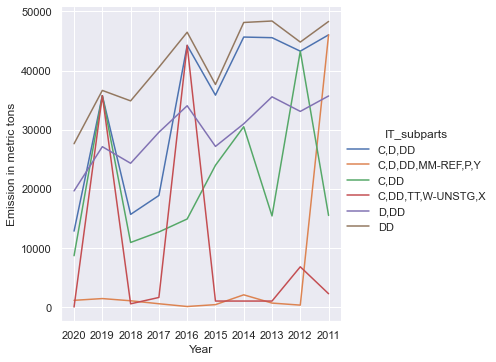

In [153]:
sns.relplot(x='Year', y='Emission in metric tons', hue='IT_subparts', kind='line', markers= True, data=df_sf6_itsb)

In [162]:
df_sf6_it_st.sort_values(by='2020',ascending =False)

,,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
State,IT_subparts,,,,,,,,,,
NC,DD,249121.92,338520.72,255959.64,320859.84,399896.04,181387.68,299769.84,172326.96,216374.28,286543.56
OH,DD,92007.88,101688.76,101016.16,108908.76,203771.20,91333.00,96539.76,115881.76,130469.96,186095.12
CO,DD,69218.52,6561.84,7765.68,10011.48,16092.24,42373.80,12147.84,92435.76,56632.92,18670.92
GA,DD,67909.80,37998.48,89904.96,113015.04,78429.72,66097.20,71040.24,89975.64,86316.24,73897.08
MN,DD,49673.79,23822.01,32714.08,35735.28,29431.36,33422.85,27794.03,22080.39,32825.10,24282.91
CA,DD,46470.96,38985.05,59492.09,45796.30,55104.63,36463.71,38367.59,36865.56,39237.39,45763.97
FL,DD,43358.76,69655.14,61709.41,68093.04,37814.01,46783.92,70115.67,60994.86,60887.34,42779.41
TN,DD,35547.48,324988.92,117862.32,159324.12,117903.36,100908.24,86523.72,107577.24,206392.44,205327.68
OK,DD,32902.68,43771.44,37975.68,12084.00,20583.84,23971.92,76931.76,27952.80,53390.76,31493.64


In [163]:
df_oog.columns

Index(['Facility Id', 'FRS_Id', 'Facility_Name', 'Basin', 'City', 'State',
       'Zip_Code', 'Address', 'County', 'Latitude', 'Longitude',
       'Primary_NAICS_Code', 'IT_subparts', '2020', 'CO2_emi_non_bio_2020',
       'Meth_CH4_emi_2020', 'N2O_emi_2020', '2019', 'CO2_emi_non_bio_2019',
       'Meth_CH4_emi_2019', 'N2O_emi_2019', '2018', 'CO2_emi_non_bio_2018',
       'Meth_CH4_emi_2018', 'N2O_emi_2018', '2017', 'CO2_emi_non_bio_2017',
       'Meth_CH4_emi_2017', 'N2O_emi_2017', '2016', 'CO2_emi_non_bio_2016',
       'Meth_CH4_emi_2016', 'N2O_emi_2016', '2015', 'CO2_emi_non_bio_2015',
       'Meth_CH4_emi_2015', 'N2O_emi_2015', '2014', 'CCO2_emi_non_bio_2014',
       'Meth_CH4_emi_2014', 'N2O_emi_2014', '2013', 'CO2_emi_non_bio_2013',
       'Meth_CH4_emi_2013', 'N2O_emi_2013', '2012', 'CO2_emi_non_bio_2012',
       'Meth_CH4_emi_2012', 'N2O_emi_2012', '2011', 'CO2_emi_non_bio_2011',
       'Meth_CH4_emi_2011', 'N2O_emi_2011'],
      dtype='object')

In [164]:
df_oog_it_st = df_oog.groupby(['State','IT_subparts'])[['2020','2019','2018','2017','2016','2015','2014','2013','2012','2011']].mean().apply(lambda x: round(x,2))


In [165]:
df_oog_it_st.head()

2020       2019       2018       2017       2016  \
State IT_subparts                                                             
AK    W-ONSH          193788.34  194756.38  205199.25  163625.17  182479.27   
AR    UU,W-ONSH        31360.80   32928.77   31222.60   27933.25   31319.84   
      W-ONSH          725019.83  690915.83  666601.28  261873.53  261063.78   
CA    NN-FRAC,W-ONSH   31463.09   26161.81   26581.46   27277.41  204506.82   
      W-ONSH          153642.83  181389.98  178516.11  168409.82  108778.18   

                           2015       2014        2013        2012        2011  
State IT_subparts                                                               
AK    W-ONSH          163352.13  221400.68   230749.74   211395.21   248107.55  
AR    UU,W-ONSH        34804.90   25059.69    15959.89    68057.81    37505.36  
      W-ONSH          276770.48  279329.85  1090864.49  1317019.94  1750914.69  
CA    NN-FRAC,W-ONSH  247908.55  261764.45   273267.91   266046.56   277409.11  
      W-ONSH          128782.46  110126.90   210574.60   227877.05   232153.37

In [166]:
df_oog_it_st.sort_values(by='2020', ascending=False)

,,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
State,IT_subparts,,,,,,,,,,
OK,"C,W-ONSH",1275834.23,1692275.99,1042170.46,1191797.06,844629.94,867805.93,1040799.85,1346026.74,872470.05,558994.89
AR,W-ONSH,725019.83,690915.83,666601.28,261873.53,261063.78,276770.48,279329.85,1090864.49,1317019.94,1750914.69
ND,W-ONSH,470553.06,833563.94,588036.16,307245.62,254546.62,439737.76,461122.42,321210.61,317716.51,297316.79
OH,W-ONSH,306758.07,414288.92,336359.67,193484.74,171081.38,252447.99,200437.09,273267.91,266046.56,277409.11
TX,W-ONSH,211828.98,263210.89,238561.82,220627.35,207949.64,256407.70,279397.24,300677.66,288261.06,299013.88
NM,W-ONSH,210710.64,276464.17,232315.10,155633.63,121991.57,177533.05,191961.49,200025.87,239276.65,259301.89
CO,W-ONSH,206331.42,311362.84,317317.69,270016.37,240129.53,260382.57,273360.63,250687.27,221496.46,228186.22
OK,W-ONSH,199689.36,266739.92,286571.22,266684.52,248990.87,306943.01,292253.46,263592.19,298957.64,288329.27
AK,W-ONSH,193788.34,194756.38,205199.25,163625.17,182479.27,163352.13,221400.68,230749.74,211395.21,248107.55


In [167]:
df_ldc.columns

Index(['Facility Id', 'FRS_Id', 'Facility_Name', 'State_where_Emissions_Occur',
       'City', 'State', 'Zip_Code', 'Address', 'County', 'Latitude',
       'Longitude', 'Primary_NAICS_Code', 'IT_subparts', '2020', '2019',
       '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011'],
      dtype='object')

In [155]:
df_ldc_it_st = df_ldc.groupby(['State','IT_subparts'])[['2020','2019','2018','2017','2016','2015','2014','2013','2012','2011']].mean().apply(lambda x: round(x,2))
df_ldc_st = df_ldc.groupby('State')[['2020','2019','2018','2017','2016','2015','2014','2013','2012','2011']].mean().apply(lambda x: round(x,2))

In [156]:
df_ldc_it_st.head()

,,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
State,IT_subparts,,,,,,,,,,
AL,"NN-LDC,W-LDC",37914.10,39847.33,41918.30,44683.78,45969.70,48890.34,51050.59,78916.69,69887.04,77369.39
AR,"NN-LDC,W-LDC",164066.75,104075.80,97976.25,65689.00,61738.55,61305.30,60879.80,62274.20,67661.55,65322.55
AZ,"NN-LDC,W-LDC",10825.92,10642.30,10572.00,10460.60,10406.50,10338.08,10061.70,9663.72,10107.70,10580.48
CA,"NN-LDC,W-LDC",548482.12,548295.63,549075.10,549689.63,552440.63,552887.50,551471.27,554877.70,567798.75,561602.05
CO,"NN-LDC,W-LDC",110734.68,132985.93,134225.12,137538.36,140616.80,149090.50,141840.84,143813.39,156855.61,136264.50


In [157]:
df_ldc_it_state = df_ldc[['State', 'IT_subparts']]

In [158]:
df_ldc_it_state.groupby('State').count()

,IT_subparts
State,
AL,5
AR,1
AZ,2
CA,3
CO,2
CT,4
DE,2
FL,5
GA,1


In [193]:
df_ldc_st.loc[['CA','MI']]

,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
State,,,,,,,,,,
CA,548482.12,548295.63,549075.10,549689.63,552440.63,552887.50,551471.27,554877.7,567798.75,561602.05
MI,229807.38,241575.74,250666.53,283846.28,279912.98,287643.83,322836.82,322731.4,128789.80,129809.43


In [178]:
df_ldc_top5 = df_ldc_st.sort_values(by='2020',ascending=False).head(5)

In [194]:
df_ldc_st.sort_values(by='2011',ascending=False)

,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
State,,,,,,,,,,
CA,548482.12,548295.63,549075.10,549689.63,552440.63,552887.50,551471.27,554877.70,567798.75,561602.05
OH,208308.80,212898.00,217864.63,223983.18,230492.38,246065.98,251461.13,281324.37,307474.82,367033.67
NJ,177008.61,190576.05,205966.23,214321.14,229195.69,242292.76,253901.23,261176.98,272323.56,280975.98
WV,104260.42,107804.05,109009.62,110552.52,112282.83,128075.58,134645.92,145267.83,167440.95,227769.10
GA,165161.15,154525.30,156542.84,154795.44,151902.05,160923.89,155671.85,155513.80,191483.40,217658.90
NY,134802.81,139004.21,144249.52,151735.65,159805.04,166606.73,172592.15,176838.09,186976.94,211198.61
OK,149571.85,153549.15,159667.20,162173.55,156144.50,159325.30,164920.75,170913.20,189506.95,188410.30
RI,137393.40,142505.35,143813.35,148417.20,153486.55,158820.20,166207.30,171913.50,177858.95,183717.65
PA,148489.66,152937.02,158476.48,152816.73,156568.37,160198.24,153391.07,156749.50,158013.15,163401.57


In [168]:
ldc_summary_scale = scale(df_ldc_st)


In [169]:
ldc_summary_scaled_df = pd.DataFrame(ldc_summary_scale, columns=df_ldc_st.columns)
ldc_summary_scaled_df.head()

,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
0,-0.451370,-0.452716,-0.460691,-0.468349,-0.449554,-0.443107,-0.452037,-0.237598,-0.323795,-0.268114
1,0.902605,0.237724,0.135793,-0.247240,-0.286119,-0.316956,-0.353386,-0.403047,-0.346235,-0.383074
2,-0.742103,-0.766663,-0.794231,-0.828594,-0.818147,-0.834847,-0.863418,-0.926069,-0.926545,-0.905469
3,5.028471,5.012976,4.935704,4.847529,4.799737,4.678144,4.570393,4.494121,4.696606,4.352835
4,0.330201,0.548500,0.521499,0.509073,0.531411,0.575054,0.459172,0.407566,0.553101,0.293912


In [170]:
ldc_pca = PCA().fit(ldc_summary_scale)

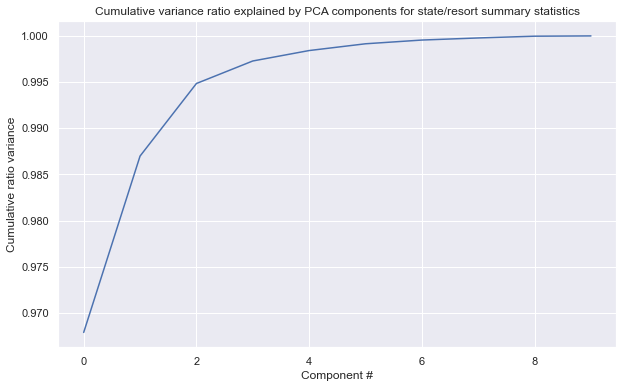

In [171]:
plt.subplots(figsize=(10, 6))
plt.plot(ldc_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for state/resort summary statistics');

In [172]:
ldc_pca_x= ldc_pca.transform(ldc_summary_scale)

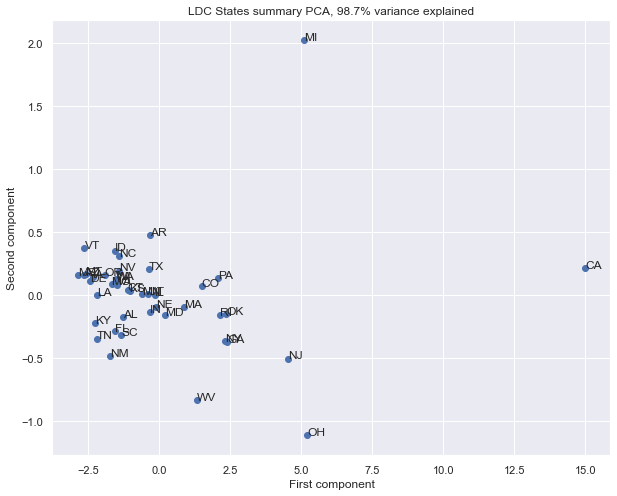

In [173]:
x = ldc_pca_x[:, 0]
y = ldc_pca_x[:, 1]
state = df_ldc_st.index
pc_var = 100 * ldc_pca.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(10,8))
plt.scatter(x=x, y=y)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f'LDC States summary PCA, {pc_var:.1f}% variance explained')
for s, x, y in zip(state, x, y):
    plt.annotate(s, (x, y))

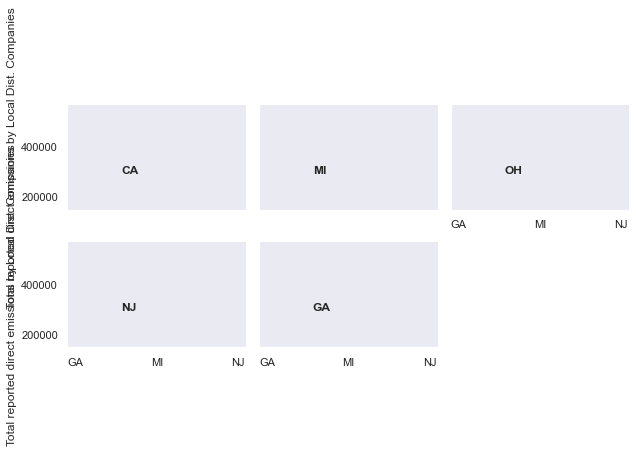

In [180]:
sns.set_theme(style="dark")

# Plot each year's time series in its own facet
g = sns.relplot(
    data=df_ldc_top5,
    x="State", y="2020", col="State", hue="State",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)

# Iterate over each subplot to customize further
for state, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.3, .35, state, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=df_ldc_top5, x="State", y="2020", units="State",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Reduce the frequency of the x axis ticks
ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("", "Total reported direct emissions by Local Dist. Companies")
g.tight_layout()